<img style="float:left" width="40%" src="pics/Universidad Burgos.png">
<img style="float:right" width="16%" src="pics/person1_bacteria_2.jpeg">

<br style="clear:both;">

# Trabajo Fin de Grado

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">NOMBRE TFG</h2>

### Nuria Martínez Queralt

### Grado en Ingeniería de la Salud 


En este notebook se han llevado a cabo una serie de tareas para la realización del TFG, el cual consiste en la identificación de neumonía a partir de radiografías de tórax empleando una red neuronal. Para esto, se deben probar distintos modelos hasta llegar al modelo más optimo de red neuronal para este caso.

## Redistribución de las imágenes

Debido a que la distribución inicial obtenida a partir del dataset descargado de internet: "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia" incluye únicamente 16 imágenes en la carpeta de validación ("val") y, esto supone problemas para la obtención de buenos resultados a la hora de construir nuestra red neuronal, antes de empezar a trabajar con las imágenes, se debe crear una función para obtener un nuevo dataset con nuevas carpetas "train", "test" y "val" y una nueva distribución de las imágenes.

In [1]:
'''
Se crea un csv con dos columnas nombres_ficheros y clases. En la columna nombres_ficheros debe aparecer el nombre de TODAS 
las imágenes que existen dentro de cada subcarpeta y en la columna clases debe aparecer 0 o 1 en función si se trata de una imágenes 
de una de las carpetas de NORMAL o PNEUMONIA respectivamente
'''
import os
import pandas as pd

# ruta donde se encuentra el dataset con la distribución inicial descargada de internet
directorio_padre='C:/Users/nuria/Downloads/TFG/data'

# Listas para almacenar los nombres de las imágenes y las clases (0 o 1 en función de si es normal o neumonía respectivamente)
nombres_ficheros = []
clases = []

# Recorremos las carpetas de train, test y val
for subcarpeta in ['train', 'test', 'val']:
    ruta_subcarpeta = os.path.join(directorio_padre, subcarpeta)
    for clase in ['NORMAL', 'PNEUMONIA']:
        ruta_clase = os.path.join(ruta_subcarpeta, clase)
        for nombre_fichero in os.listdir(ruta_clase):
            #CREO QUE LA SIGUIENTE LINEA NO HACE FALTA
            #if nombre_fichero.endswith(('.png', '.jpg', '.jpeg')):  # Puedes ajustar esto a tus extensiones de imagen
            nombres_ficheros.append(nombre_fichero)
            clases.append(0 if clase == 'NORMAL' else 1)

# Se crea el DataFrame con los datos
df_todas = pd.DataFrame({'nombre_fichero': nombres_ficheros,'clase': clases})

# Se guarda el DataFrame en un archivo CSV
ruta_csv = os.path.join(directorio_padre, 'dataset_info.csv')
df_todas.to_csv(ruta_csv, index=False)

print(f'Archivo CSV guardado en: {ruta_csv}')


Archivo CSV guardado en: C:/Users/nuria/Downloads/TFG/data\dataset_info.csv


In [2]:
df_todas

,nombre_fichero,clase
0,IM-0115-0001.jpeg,0
1,IM-0117-0001.jpeg,0
2,IM-0119-0001.jpeg,0
3,IM-0122-0001.jpeg,0
4,IM-0125-0001.jpeg,0
...,...,...
5851,person1949_bacteria_4880.jpeg,1
5852,person1950_bacteria_4881.jpeg,1
5853,person1951_bacteria_4882.jpeg,1
5854,person1952_bacteria_4883.jpeg,1


In [3]:
#DENTRO DE LAS CARPETAS PNEUMONIA, SE PUEDE TENER EN CUENTA VIRAL Y BACTERIANA

In [4]:
'''
A partir del csv anterior y, con ayuda de la función train_test_split de skitlearn de debe dividir el csv anterior en dos 
subgrupos de train y test en proporción 80, 20 para poder usar el 80% de las imágenes para train y el 20% para test.
También se emplea el parámetro stratify para que también exista una proporción de clases en cada uno de los grupos.
Posteriormente se deberá dividir el conjunto de train en 2 para obtener así el subconjunto de validación.
'''

import pandas as pd
from sklearn.model_selection import train_test_split

# se emplea train_test_split para dividir el dataset en train (80%) y test (20%)
# random_state=42 se emplea para que cada vez que se ejecute el código, se obtenga la misma división de datos. El valor 42 es un valor que se usa
# comunmente en este caso pero se puede emplear cualquie otro valor entero
# stratify se emplea para agrupar de manera proporcional las clases neumonia y normal en los distintos dataframes
train_df, test_df = train_test_split(df_todas, test_size=0.2, stratify=df_todas['clase'], random_state=42)

# Se guardan los nuevos conjuntos de datos en archivos CSV
ruta_train_csv = 'C:/Users/nuria/Downloads/TFG/data/train_dataset_info.csv' #cambiar ruta en caso necesario (lo ultimo es el nombre del nuevo)
ruta_test_csv = 'C:/Users/nuria/Downloads/TFG/data/test_dataset_info.csv' #cambiar ruta en caso necesario (lo ultimo es el nombre del nuevo)
train_df.to_csv(ruta_train_csv, index=False)
test_df.to_csv(ruta_test_csv, index=False)

print(f'Archivo CSV de entrenamiento guardado en: {ruta_train_csv}')
print(f'Archivo CSV de prueba guardado en: {ruta_test_csv}')


Archivo CSV de entrenamiento guardado en: C:/Users/nuria/Downloads/TFG/data/train_dataset_info.csv
Archivo CSV de prueba guardado en: C:/Users/nuria/Downloads/TFG/data/test_dataset_info.csv


In [5]:
train_df

,nombre_fichero,clase
5786,person80_bacteria_391.jpeg,1
1427,person1051_virus_1750.jpeg,1
4746,person734_bacteria_2637.jpeg,1
3695,person410_bacteria_1825.jpeg,1
1987,person1320_bacteria_3347.jpeg,1
...,...,...
3896,person462_bacteria_1968.jpeg,1
989,NORMAL2-IM-0944-0001.jpeg,0
3554,person371_bacteria_1701.jpeg,1
2472,person1518_virus_2645.jpeg,1


In [6]:
test_df

,nombre_fichero,clase
3209,person294_bacteria_1388.jpeg,1
3334,person321_bacteria_1483.jpeg,1
2119,person1372_bacteria_3502.jpeg,1
2384,person1484_bacteria_3878.jpeg,1
160,IM-0346-0001.jpeg,0
...,...,...
4445,person5_bacteria_15.jpeg,1
5326,NORMAL2-IM-0135-0001.jpeg,0
4764,person740_virus_1362.jpeg,1
4573,person646_bacteria_2538.jpeg,1


In [7]:
'''
A continuación, se coge el conjunto de datos obtenido previamente de train, es decir, el csv "train_df" y se repite el mismo
proceso pero, esta vez dividiendo este conjunto de datos para train y val en un 80% y 20% respectivamente.
De tal forma que, finalemnte se obtenga el conjunto de test que represneta el 20% del total (obtenido previamente), el conjunto de train
que representa el 80% del 80% del total ya que, inicialmente nos hemos quedado con el 80% pero luego, de este 80%, el 20% va destinado al conjunto
de validación.
'''

from sklearn.model_selection import train_test_split

# Se emplea train_test_split para dividir el conjunto de datos de entrenamiento en train (80%) y val (20%)
train_def_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['clase'], random_state=42)

# Se guardan los nuevos conjuntos de datos en archivos CSV
ruta_train_final_csv = 'C:/Users/nuria/Downloads/TFG/data/train_final_dataset_info.csv' #cambiar ruta en caso necesario (lo ultimo es el nombre del nuevo)
ruta_val_csv = 'C:/Users/nuria/Downloads/TFG/data/val_dataset_info.csv' #cambiar ruta en caso necesario (lo ultimo es el nombre del nuevo)
train_def_df.to_csv(ruta_train_final_csv, index=False)
val_df.to_csv(ruta_val_csv, index=False)

print(f'Archivo CSV de entrenamiento final guardado en: {ruta_train_final_csv}')
print(f'Archivo CSV de validación guardado en: {ruta_val_csv}')


Archivo CSV de entrenamiento final guardado en: C:/Users/nuria/Downloads/TFG/data/train_final_dataset_info.csv
Archivo CSV de validación guardado en: C:/Users/nuria/Downloads/TFG/data/val_dataset_info.csv


In [8]:
train_def_df

,nombre_fichero,clase
649,NORMAL2-IM-0448-0001.jpeg,0
3096,person266_virus_549.jpeg,1
513,IM-0666-0001-0001.jpeg,0
2205,person1411_bacteria_3610.jpeg,1
665,NORMAL2-IM-0468-0001.jpeg,0
...,...,...
4830,person772_virus_1401.jpeg,1
3485,person354_bacteria_1635.jpeg,1
1691,person1180_virus_2012.jpeg,1
1748,person1216_bacteria_3168.jpeg,1


In [9]:
val_df

,nombre_fichero,clase
2130,person1377_virus_2369.jpeg,1
3359,person326_bacteria_1506.jpeg,1
3281,person30_bacteria_151.jpeg,1
1588,person113_virus_215.jpeg,1
1459,person1070_virus_1773.jpeg,1
...,...,...
991,NORMAL2-IM-0946-0001.jpeg,0
5234,IM-0025-0001.jpeg,0
1662,person1170_virus_1970.jpeg,1
5531,person127_bacteria_602.jpeg,1


In [10]:
'''
Función para encontrar una imagen concreta (a prtir de su nombre) dentro de cualquiera de las subcarpetas
Esta función es de gran interés para el apartado que se hace a continuación ya que, para encontrar la ruta_origen de la imagen
no se sabe en que carpeta está concretamente y por tanto es necesario acceder a su ruta a partir de esta función
'''

import os

def buscar_imagen(directorio_padre, nombre_imagen):
    # Subcarpetas principales en las que buscar
    subcarpetas_principales = ['train', 'test', 'val']
    # Subcarpetas adicionales en las que buscar dentro de cada subcarpeta principal
    subcarpetas_adicionales = ['NORMAL', 'PNEUMONIA']

    # Se itera sobre las subcarpetas principales
    for subcarpeta_principal in subcarpetas_principales:
        # Se itera sobre las subcarpetas adicionales dentro de cada subcarpeta principal
        for subcarpeta_adicional in subcarpetas_adicionales:
            # Se obtiene la ruta completa de la imagen
            ruta_imagen = os.path.join(directorio_padre, subcarpeta_principal, subcarpeta_adicional, nombre_imagen)
            # verificar si la imagen existe en la subcarpeta actual
            if os.path.exists(ruta_imagen):
                return ruta_imagen  # devolver la ruta de la imagen si se encuentra
    



In [11]:
'''
Finalmente, se crea una nueva carpeta denominada data_nuevo, dentro de esta carpeta se crean 3 subcarpetas ("train", "test" y "val")
que corresponderian con los dataframes obtenidos hasta hora: train_def_df, val_df y test_df y, dentro de estas 3 subcarpetas, se crean
2 carpetas "NORMAL" y "PNEUMONIA" que corresponden con con las clases determinadas en cada dataframe, 0 en caso de "NORMAL" y 1 para "PNEUMONIA".
Dentro de estas dos carpetas para ("train", "test" y "val") se encontraran las imagenes correspondientes para cada caso según los dataframes obtenidos.
'''

import os
import shutil

# Ruta principal donde se crearán las nuevas carpetas
ruta_principal_nueva = 'C:/Users/nuria/Downloads/TFG/data_nuevo'


# Se crean las carpetas 'train', 'test' y 'val' dentro de la carpeta principal
for subcarpeta in ['train', 'test', 'val']:
    ruta_subcarpeta = os.path.join(ruta_principal_nueva, subcarpeta)
    os.makedirs(ruta_subcarpeta, exist_ok=True) #verifica si la carpeta ruta_subcarpeta ya existe. Si existe, no se hace nada y el programa continúa su ejecución sin lanzar un error. Si no existe, la función os.makedirs() la crea junto con cualquier carpeta intermedia necesaria en la ruta especificada
    
    # Se crean las subcarpetas 'normal' y 'neumonia' dentro de cada subcarpeta ('train', 'test' y 'val')
    for clase in ['NORMAL', 'PNEUMONIA']:
        ruta_clase = os.path.join(ruta_subcarpeta, clase)
        os.makedirs(ruta_clase, exist_ok=True)

            
# Se copian los archivos CSV a las subcarpetas correspondientes
for df, nombre_carpeta in [(train_def_df, 'train'), (val_df, 'val'), (test_df, 'test')]:
    for index, row in df.iterrows(): #se itera sobre cada dataframe fila a fila
        clase = 'NORMAL' if row['clase'] == 0 else 'PNEUMONIA'
        nombre_archivo = row['nombre_fichero']

        # ruta de origen donde se busca la imagen concreta a partir de la función realizada previamente
        # esta ruta se refiere a donde esta que se desea guardar en la carpeta destino originalmente para poder copiarla
        ruta_origen=buscar_imagen('C:/Users/nuria/Downloads/TFG/data', nombre_archivo)
        
        # ruta donde se desa guardar (y redestribuir de la forma correcta) las imágenes
        ruta_destino = os.path.join(ruta_principal_nueva, nombre_carpeta, clase, nombre_archivo)
        
        shutil.copyfile(ruta_origen, ruta_destino) # copia las imágenes de la ruta incial a la ruta final




In [ ]:
#METER ESTO EN UNA O VARIAS FUNCIONES

A partir de aqui, se va a trabajar con la nueva carpeta de imágenes y su nueva distribución para evitar errores

## Preparación del modelo

Se prepara el modelo para poder trabajar con las imágenes de train, test y val

In [1]:
#https://www.kaggle.com/code/paola311/clasificaci-n-de-im-genes-cnn

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import keras
from keras import layers

def preparar_modelo(ruta, batch_size):

    '''
    Función que configura los generadores de datos para entrenar, validar y probar un modelo de aprendizaje automático con imágenes.
    -----------------------------------------------------------
    Parámetros:
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test)
    - batchsize: int. Tamaño del lote que se utiliza en una única iteración del algoritmo de aprendizaje
    ----------------------------------------------------
    Return:
    - nada
    '''
    
    dir_general = ruta #ubicacion donde se encuentran las imágenes organizadas en subcarpetas (train, val, test). Añadir esta carpeta a one drive en TFG

    dir_train = os.path.join(dir_general, 'train')
    dir_validation = os.path.join(dir_general, 'val')
    dir_test = os.path.join(dir_general, 'test')
    
    # Preprocesamiento de imágenes
    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen=ImageDataGenerator(rescale=1./255)
    
    #Iterador que recorre el directorio de imágenes
    train_generator = train_datagen.flow_from_directory(
        dir_train,
        target_size=(150, 150),
        batch_size=batch_size, #lo más grande posible que no cause problemas de memoria 
        class_mode='binary')
    
    validation_generator = validation_datagen.flow_from_directory(
        dir_validation,
        target_size=(150, 150),
        batch_size=batch_size, #lo más grande posible que no cause problemas de memoria 
        class_mode='binary')
    
    test_generator = test_datagen.flow_from_directory(
        dir_test,
        target_size=(150, 150),
        batch_size=batch_size, #lo más grande posible que no cause problemas de memoria 
        class_mode='binary')
    
    return train_generator, validation_generator, test_generator


    


In [2]:
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo'
batch_size=20

train_generator, validation_generator, test_generator = preparar_modelo(ruta, batch_size)

Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


## Matriz de confusión para ver como funciona el modelo más simple

Se obtiene la matriz de confusión para un primer modelo muy simple para, así poder comprobar como estos resultados mejoran al introducir capas ocultas, modificar parámetros...

In [3]:
#se trabaja con el modelo más simple (posteriormente denominado Simple1)
input_shape=(150,150,3)

model = keras.Sequential( 
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), 
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), 
        layers.Dense(1, activation="sigmoid"), #una unica neurina, sigmoide
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

In [4]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size = 32 
epochs = 20

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall","AUC"]) #cambias loss

# con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 5 épocas (patience)
model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_auc', patience=10,restore_best_weights=True)) 

Epoch 1/20
188/188 [==============================] - 126s 655ms/step - loss: 0.2915 - accuracy: 0.8703 - recall: 0.9451 - auc: 0.9285 - val_loss: 0.1568 - val_accuracy: 0.9456 - val_recall: 0.9635 - val_auc: 0.9786
Epoch 2/20
188/188 [==============================] - 124s 659ms/step - loss: 0.1357 - accuracy: 0.9512 - recall: 0.9718 - auc: 0.9847 - val_loss: 0.2976 - val_accuracy: 0.8837 - val_recall: 0.8523 - val_auc: 0.9790
Epoch 3/20
188/188 [==============================] - 125s 666ms/step - loss: 0.1244 - accuracy: 0.9533 - recall: 0.9733 - auc: 0.9865 - val_loss: 0.2051 - val_accuracy: 0.9360 - val_recall: 0.9298 - val_auc: 0.9791
Epoch 4/20
188/188 [==============================] - 118s 629ms/step - loss: 0.1184 - accuracy: 0.9586 - recall: 0.9773 - auc: 0.9875 - val_loss: 0.1557 - val_accuracy: 0.9456 - val_recall: 0.9532 - val_auc: 0.9807
Epoch 5/20
188/188 [==============================] - 119s 631ms/step - loss: 0.0887 - accuracy: 0.9698 - recall: 0.9824 - auc: 0.9929 -

In [5]:
y_test=test_generator.labels
y_pred=model.predict(test_generator)

59/59 [==============================] - 28s 464ms/step


In [6]:
y_pred=y_pred>0.5 #para convertirlo en un problema binario

In [7]:
#matriz de confusión con sklearn
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred) #.ravel()

In [8]:
matriz

array([[ 87, 230],
       [246, 609]], dtype=int64)

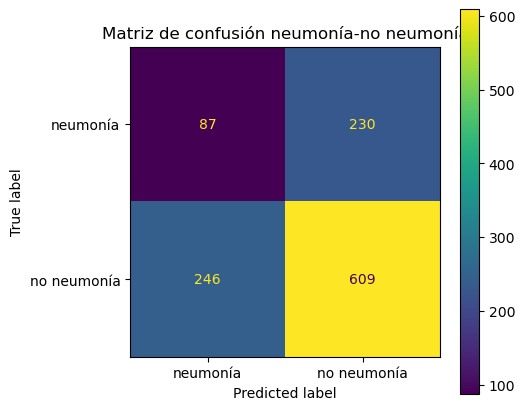

In [9]:
#PERCEPTRON SKLEARN

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y_test)

matriz_conf = metrics.confusion_matrix(y_test, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_conf, display_labels = ["neumonía" , "no neumonía"])
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión neumonía-no neumonía")
plt.show()

Como se puede observar, los resultados en este primer modelo tan simple, sin ninguna capa oculta, son bastante malos ya que, poniendo esto en un caso clínico real, significaría que 230 pacientes con neumonía hubieran sido diagnosticados como no neumonía y 246 pacientes sin neumonía hubieran sido diagnosticados con neumonía, lo que supondría serios problemas.

## Creación de métricas

Se crea una función para calcular las distintas métricas que servirán para la posterior evaluación de cada modelo que se realice.

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

'''import numpy as np
import tensorflow as tf'''

def metricas(y_test, y_pred):
    '''
    Funcicón que calcula distintas métricas para la evaluación del modelo.
    -----------------------------------------------------
    Parámetros: 
    - y_test: array de etiquetas verdaderas del conjunto de prueba
    - y_pred: array de etiquetas predichas por el modelo
    ----------------------------------------
    Return: 
    - accuracy: float que indica la proporción de predicciones correctas
    - precision: float que indica la proporción de predicciones positivas correctas
    - recall: float que indica la proporción de positivos detectados
    - f1: float que indica la media armónica de precisión y exhaustividad para evaluar de una forma más equilibrada el rendimiento del modelo
    - specificity: float que indica la proporción de negativos detectados
    - fpr: float que indica la tasa de falsos positivos, es decir, la proporción de negativos incorrectamente clasificadas como positivos, 
    respecto al total de casos negativos reales.
    - fnr: float que indica la tasa de falsos negativos, es decir, la proporción de positivos incorrectamente clasificadas como negativos, 
    respecto al total de casos positivos reales.
    - auc: float que se emplea para evaluar la capacidad de distinción entre clases positivas y negativas de un modelo de clasificación 
    binaria. Un 1 significa que es capaz de distinguir perfectamente entre clases, un 0.5 significa una clasificación aleatoria y un 0 indica 
    que ninguna clase ha sido correctamente clasificada.
    '''
    y_pred=y_pred>0.5 #para convertirlo en un problema binario
    
    #se obtienen los verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos a partir de la matriz de confusión 
    #con .ravel() se convierte la matriz en un array unidimensional
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 

    #se calculan cada una de las métricas empleando su correspondiente fórmula
    accuracy = (tp + tn)/(tn + fp + fn + tp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * ((precision*recall)/(precision+recall))
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn) #tasa de falsos positivos
    fnr = fn / (fn + tp) #tasa de falsos negativos
    auc = roc_auc_score(y_test, y_pred)

    
    return [accuracy, precision, recall, f1, specificity, fpr, fnr, auc] #se devuleve como una lista para poder trabajar correctmante con las métricas


    


In [11]:
y_test=test_generator.labels
y_pred=model.predict(test_generator)

59/59 [==============================] - 27s 456ms/step


In [18]:
metricas(y_test, y_pred)

[0.5870307167235495,
 0.7210965435041716,
 0.7076023391812866,
 0.7142857142857142,
 0.2618296529968454,
 0.7381703470031545,
 0.29239766081871343,
 0.484715996089066]

## Comparación de distintas arquitecturas de modelo y distintos batch_size

Para realizar una comparación entre distintas arquitecturas y distintos batch_size, en primer lugar, se generan diferentes modelos de arquitectura de red neuronal variando las capas, el número de capas, etc y, después se entrenan y evalúan los modelos generados con distintos batch sizes. Para esto, se emplean las métricas previamente definidas.

In [20]:

def establecer_arquitectura(tipo):

    '''
    Función que establece distintos tipos de modelos de red neuronal convolucional (CNN) según el tipo que se introduzca como parámetro.
    --------------------------------------------------------------
    Parámetros
    - tipo: str que indica el tipo de modelo al que se quiere acceder 
    -------------------------------------------------------------
    Return
    -model: modelo sequencial en keras según el tipo que se haya introducido como parámetro de entrada y que contiene toda la información necesaria 
    sobre la arquitectura del modelo
    '''
    
    input_shape=(150,150,3) # se define el tamaño de entrada de las imágenes

    '''
    El modelo Simple1, se corresponde con un modelo que posee varias capas convolucionales (con las que se obtienen características importantes
    de las imágenes) seguidas de capas de MaxPooling2D para reducir la dimensionalidad. Después del Flatten se encuentra una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    Este modelo es muy simple y los resultados no van a ser buenos.
    '''

    
    
    if tipo == "Simple1":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dropout(0.2), #cambiar a menos de 0,5 
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
        
        '''
    El modelo Simple2, se corresponde con un modelo que posee varias capas convolucionales (con las que se obtienen características importantes
    de las imágenes) seguidas de capas de MaxPooling2D para reducir la dimensionalidad. Después del Flatten se encuentra una capa oculta de 
    100 unidades y una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    '''

    elif tipo == "Simple2":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dense(100, activation="relu"), #100 neuronas en la primera capa
                layers.Dropout(0.2),
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
        '''
    El modelo Simple3, se corresponde con un modelo que posee varias capas convolucionales (con las que se obtienen características importantes
    de las imágenes) seguidas de capas de MaxPooling2D para reducir la dimensionalidad. Después del Flatten se encuentra una capa se encuentra 
    una capa oculta de 100 neuronas, una segunda capa oculta de 16 neuronas y una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    '''

    elif tipo == "Simple3":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dense(100, activation="relu"), #100 neuronas en la primera capa
                layers.Dropout(0.2),
                layers.Dense(16, activation="relu"), #16 neuronas en la segunda capa
                layers.Dropout(0.2),
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
    else: #si no se cumple ninguna de las opciones anteriores, aparece un error
        raise ValueError("Tipo de arquitectura no reconocida")
    
    return model #model.summary??




In [ ]:
#PRUEBA/EJECUTAR 2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import keras
from keras import layers

import pandas as pd
from keras.callbacks import EarlyStopping

def arq_batch(ruta,epochs,batch_sizes,modelos):
    '''
    Función que devuelve una tabla comparativa para distintas arquitecturas de modelo y distintos batch size introducidos como parámetros. 
    ----------------------------------------------------
    Parámetros:
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test)
    - epochs: int. Número de épocas a entrenar 
    - batch_sizes: lista con los distintos valores de batch size para probar en cada entrenamiento
    - modelos: lista de nombres de cada uno de los modelos que se van a comparar obtenidos partir de la función realizada previamente 
    "establecer_arquitectura(modelo)"
    --------------------------------------------------
    Return:
    - compara_arqu_batch_def: dataframe que contiene como índice las columnas referidas al modelo de arquitectura y al valor de batch size. El dataframe 
    obtenido se observa como una tabla comparativa de diversas métricas para cada arquitectura y cada batch size.
    '''
    
    #se inicializa un dataframe vacío donde, posteriormente se van a añadir todos los componentes necesarios para comparar los distintos 
    #modelos de arquitectura para distintos batch size (comparando las métricas)
    compara_arqu_batch=pd.DataFrame()
    

    #bucle en el que se recorren cada uno de los modelos y los tamaños de batch_size 
    for modelo in modelos:
        print(f"Comparando modelo {modelo}...")
        for batch_size in batch_sizes:
            print(f"Entrenando modelo {modelo} y batch_size {batch_size}")
    
            #se emplea la función preparar_modelo para configurar los generadores de datos para entrenar, validar y probar 
            #un modelo de aprendizaje automático con imágenes
            preparar_modelo(ruta, batch_size)
            
            #se emplea la función establecer_arquitectura para determinar el modelo con el que se trabaja cada vez
            model = establecer_arquitectura(modelo)
            
            #se compila el modelo y se calculan las métricas con las que se quiere trabajar
            #en este caso, en la función de pérdida "loss", se emplea la entropía cruzada binaria "binary_crossentropy" ya que se trata de 
            #un problema de clasificación binaria
            model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall"]) #cambias loss
    
            #ENTRENA
            # con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 10 épocas (patience)
            model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_auc', patience=10,restore_best_weights=True))
    
            #se calculan las métricas
            y_test=test_generator.labels
            y_pred=model.predict(test_generator)
            calculo_metricas=metricas(y_test, y_pred) #se llama a la función creada previamente para calcular las métricas de cada modelo
            #se calcula loss a partir de la evaluación del modelo
            loss=model.evaluate(test_generator, verbose=0)[0]
            
            #esto es en caso de querer meter todos estos parametros dentro de metricas (cambiando tambien la linea de arriba, en lugar de metricas loss, accuracy...)
            #metricas = f"Loss: {loss}, Accuracy: {accuracy}, Recall: {recall}, AUC: {AUC}, Precision: {precision}"
    
            #cambiar .append por .concat
            #se añaden todos los componentes necesarios para comparar los distintos modelos de arquitectura para distintos batch size 
            #(comparando las métricas)
            compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)
    
    #se fijan las columnas Red y BatchSize como índices. 
    compara_arqu_batch.set_index(["Red","BatchSize"], inplace=True) #inplace=True se pone para modificar el dataframe original ya que sino, no se modifica
    compara_arqu_batch_def = compara_arqu_batch.round(2) #se redondean los decimales a 2
    return compara_arqu_batch_def


In [ ]:
#learning rate 0,001 

In [ ]:
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo'
epochs=20
batch_sizes=[8, 16, 20, 32, 64]  # distintos tamaños de batch size para probar
modelos=["Simple1", "Simple2", "Simple3"]  # Lista de nombres de modelos
arq_batch(ruta,epochs,batch_sizes,modelos)

In [ ]:
'''#PRUEBA/EJECUTAR
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import keras
from keras import layers

import pandas as pd
from keras.callbacks import EarlyStopping

batch_sizes=[8, 16, 20, 32, 64]  # distintos tamaños de batch size para probar
modelos=["Simple1", "Simple2", "Simple3"]  # Lista de nombres de modelos

#se inicializa un dataframe vacío donde, posteriormente se van a añadir todos los componentes necesarios para comparar los distintos 
#modelos de arquitectura para distintos batch size (comparando las métricas)
compara_arqu_batch=pd.DataFrame()

epochs=20

#bucle en el que se recorren cada uno de los modelos y los tamaños de batch_size 
for modelo in modelos:
    print(f"Comparando modelo {modelo}...")
    for batch_size in batch_sizes:
        print(f"Entrenando modelo {modelo} y batch_size {batch_size}")

        #SE PREPARA EL MODELO
        dir_general = 'C:/Users/nuria/Downloads/TFG/data' #ubicacion donde yo tengo metida la carpeta data (cambiar en caso necesario) y añadir esta carpeta a one drive en TFG

        dir_train = os.path.join(dir_general, 'train')
        dir_validation = os.path.join(dir_general, 'val')
        dir_test = os.path.join(dir_general, 'test')

        # Preprocesamiento de imágenes
        train_datagen = ImageDataGenerator(rescale=1./255)
        test_datagen = ImageDataGenerator(rescale=1./255)
        validation_datagen=ImageDataGenerator(rescale=1./255)
        
        #Iterador que recorre el directorio de imágenes
        train_generator = train_datagen.flow_from_directory(
            dir_train,
            target_size=(150, 150), #todas las imágenes se redimensionen a 150x150 píxeles, de forma que, si existen tamaños diferentes entre ellas, se uniforman
            batch_size=batch_size, # se itera para distintos valores de batch size
            class_mode='binary')
        
        validation_generator = validation_datagen.flow_from_directory(
            dir_validation,
            target_size=(150, 150), #todas las imágenes se redimensionen a 150x150 píxeles, de forma que, si existen tamaños diferentes entre ellas, se uniforman
            batch_size=batch_size, #lo más grande posible que no cause problemas de memoria 
            class_mode='binary')
        
        test_generator = test_datagen.flow_from_directory(
            dir_test,
            target_size=(150, 150), #todas las imágenes se redimensionen a 150x150 píxeles, de forma que, si existen tamaños diferentes entre ellas, se uniforman
            batch_size=batch_size, #lo más grande posible que no cause problemas de memoria 
            class_mode='binary')
        
        #se emplea la función establecer_arquitectura para determinar el modelo con el que se trabaja cada vez
        model = establecer_arquitectura(modelo)
        
        #se compila el modelo y se calculan las métricas con las que se quiere trabajar
        #en este caso, en la función de pérdida "loss", se emplea la entropía cruzada binaria "binary_crossentropy" ya que se trata de 
        #un problema de clasificación binaria
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall"]) #cambias loss

        #ENTRENA
        # con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 3 épocas (patience)
        model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_loss', patience=3))

        #se calculan las métricas
        y_test=test_generator.labels
        y_pred=model.predict(test_generator)
        calculo_metricas=metricas(y_test, y_pred) #se llama a la función creada previamente para calcular las métricas de cada modelo
        #se calcula loss a partir de la evaluación del modelo
        loss=model.evaluate(test_generator, verbose=0)[0]
        
        #esto es en caso de querer meter todos estos parametros dentro de metricas (cambiando tambien la linea de arriba, en lugar de metricas loss, accuracy...)
        #metricas = f"Loss: {loss}, Accuracy: {accuracy}, Recall: {recall}, AUC: {AUC}, Precision: {precision}"

        #cambiar .append por .concat
        #se añaden todos los componentes necesarios para comparar los distintos modelos de arquitectura para distintos batch size 
        #(comparando las métricas)
        compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)




In [ ]:
'''#se fijan las columnas A y B como índices. 
compara_arqu_batch.set_index(["Red","BatchSize"], inplace=True) #inplace=True se pone para modificar el dataframe original ya que sino, no se modifica
compara_arqu_batch_def = compara_arqu_batch.round(2) #se redondean los decimales a 2
compara_arqu_batch_def

In [ ]:
#Por lo tanto, se puede deducir que, 

In [ ]:
'''import pandas as pd
from keras.callbacks import EarlyStopping

batch_sizes=[8, 16, 20, 32, 64]  # distintos tamaños de batch size para probar
modelos=["Simple1", "Simple2", "Simple3"]  # Lista de nombres de modelos

#se inicializa un dataframe vacío donde, posteriormente se van a añadir todos los componentes necesarios para comparar los distintos 
#modelos de arquitectura para distintos batch size (comparando las métricas)
compara_arqu_batch=pd.DataFrame()

epochs=5

#bucle en el que se recorren cada uno de los modelos y los tamaños de batch_size 
for modelo in modelos:
    print(f"Comparando modelo {modelo}...")
    for batch_size in batch_sizes:
        print(f"Entrenando modelo {modelo} y batch_size {batch_size}")
        
        #se emplea la función establecer_arquitectura para determinar el modelo con el que se trabaja cada vez
        model = establecer_arquitectura(modelo)
        
        #se compila el modelo y se calculan las métricas con las que se quiere trabajar
        #en este caso, en la función de pérdida "loss", se emplea la entropía cruzada binaria "binary_crossentropy" ya que se trata de 
        #un problema de clasificación binaria
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall"]) #cambias loss

        #ENTRENA
        # con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 3 épocas (patience)
        model.fit(train_generator, batch_size=batch_size, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_loss', patience=3))

        #se calculan las métricas
        y_test=test_generator.labels
        y_pred=model.predict(test_generator)
        calculo_metricas=metricas(y_test, y_pred) #se llama a la función creada previamente para calcular las métricas de cada modelo
        #se calcula loss a partir de la evaluación del modelo
        loss=model.evaluate(test_generator, verbose=0)[0]

        #esto es en caso de querer meter todos estos parametros dentro de metricas (cambiando tambien la linea de arriba, en lugar de metricas loss, accuracy...)
        #metricas = f"Loss: {loss}, Accuracy: {accuracy}, Recall: {recall}, AUC: {AUC}, Precision: {precision}"

        #cambiar .append por .concat
        #se añaden todos los componentes necesarios para comparar los distintos modelos de arquitectura para distintos batch size 
        #(comparando las métricas)
        compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)



In [ ]:
'''compara_arqu_batch

In [ ]:
#Por lo tanto, se puede apreciar que la primera arquitectura es la peor de todas (algo que era de esperar) y la mejor opcion es 
# el Simple 2 ya que, en general (exceptuando para una batch size de 8) obtiene mejores resultados.
#Dentro del Simple 2, el mejor valor de batch size es el de 32 ya que es el que presenta mejores resultados

## Comparación de distintos valores de número de neuronas para la arquitectura "Simple2" y un batchsize de 32

A partir de los resultados obtenidos previamente, se comparan distintos valores de número de neuronas para determinar con cuál funciona mejor el modelo.

In [ ]:
#antes hay que ejecutar train generatos y la funcion de metricas

In [ ]:
import pandas as pd
from keras.callbacks import EarlyStopping

def neuronas(num_neuronas, epochs, ruta, batch_size):

    '''
    Función que devuelve una tabla comparativa para distintas valores de neuronas introducidos como parámetros a partir del modelo y el batch size
    seleccionado previamente.
    ------------------------------------------------------------------------
    Parámetros;
    - num_neuronas:
    - epochs:
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test)
    - batch_size: int. Tamaño del lote que se utiliza en una única iteración del algoritmo de aprendizaje. Se emplea dentro de la función
    "preparar_modelo" para determinar el tamaño del lote para cada uno de los generadores (train, val y test)
    ----------------------------------------------------------------
    Return:
    - compara_neuronas_def: dataframe que contiene como índice las columnas referidas al número de neuronas. El dataframe 
    obtenido se observa como una tabla comparativa de diversas métricas para cada número de neuronas.
    '''
    
    #se inicializa un dataframe vacío donde, posteriormente se van a añadir todos los componentes necesarios para comparar y determinar cual es el mejor
    #valor de neuronas en la capa oculta
    compara_neuronas=pd.DataFrame()
    
    input_shape=(150,150,3)

    #se emplea la función preparar_modelo para configurar los generadores de datos para entrenar, validar y probar 
    #un modelo de aprendizaje automático con imágenes
    preparar_modelo(ruta, batch_size)
    
    for neurona in num_neuronas:
        print(f"Modelo con {neurona} neuronas en su capa oculta...")
    
        #se emplea el modelo Simple2 que es el que se ha determinado previamente como "mejor"
        model = keras.Sequential(
                [
                    keras.Input(shape=input_shape),
                    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                    layers.MaxPooling2D(pool_size=(2, 2)),
                    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                    layers.MaxPooling2D(pool_size=(2, 2)),
                    layers.Flatten(), #convierte imágenes en vectores
                    layers.Dense(neurona, activation="relu"), #se va cambiando el valor de "neurona" para cada uno de los valores que estan en la lista num_neuronas
                    layers.Dropout(0.2),
                    layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
                ]
            )
        
        #se compila el modelo y se calculan las métricas con las que se quiere trabajar
        #en este caso, en la función de pérdida "loss", se emplea la entropía cruzada binaria "binary_crossentropy" ya que se trata de 
        #un problema de clasificación binaria
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall"]) #cambias loss
    
        #ENTRENA
        # con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 10 épocas (patience)
        #se emplea un batch size de 32 que es el que ha dado mejores resultados antes
        model.fit(train_generator, batch_size=32, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_auc', patience=10,restore_best_weights=True))
    
        #se calculan las métricas
        y_test=test_generator.labels
        y_pred=model.predict(test_generator)
        calculo_metricas=metricas(y_test, y_pred) #se llama a la función creada previamente para calcular las métricas de cada modelo
        #se calcula loss a partir de la evaluación del modelo
        loss=model.evaluate(test_generator, verbose=0)[0]
    
        #esto es en caso de querer meter todos estos parametros dentro de metricas (cambiando tambien la linea de arriba, en lugar de metricas loss, accuracy...)
        #metricas = f"Loss: {loss}, Accuracy: {accuracy}, Recall: {recall}, AUC: {AUC}, Precision: {precision}"
    
        #cambiar .append por .concat
        #se añaden todos los componentes necesarios para comparar los distintos modelos de arquitectura para distintos batch size 
        #(comparando las métricas)
        compara_neuronas=compara_neuronas.append({"Número de neuronas": neurona, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)
    
    #se fija la columna "Número de neuronas" como índice. 
    compara_neuronas.set_index("Número de neuronas", inplace=True) #inplace=True se pone para modificar el dataframe original ya que sino, no se modifica
    compara_neuronas_def = compara_neuronas.round(2) #se redondean los decimales a 2
    return compara_neuronas_def
    
        #PONER int(neurona) si salen como decimanles



In [ ]:
num_neuronas=[32, 64, 128, 156] #lista con distintos valores de neuronas para probar
epochs=20
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo'
batchsize=20

neuronas(num_neuronas, epochs, ruta, batch_size)

Por lo tanto, se puede apreciar que, el mejor modelo se corresponde con 64 neuronas en la capa oculta ya que, 
tiene un valor mayor en la gran parte de métricas (aunque en loss deberia ser menor) CAMBIAR EN CASO NECESARIO

## Matriz de confusión para ver como funciona el modelo elegido finalmente

Finalmente, se obtiene la matriz de confusión para el modelo final obtenido.

In [ ]:
#CAMBIAR TODO LO QUE HAY A CONTINUACION POR EL MODELO FINAL

In [ ]:
ruta='C:/Users/nuria/Downloads/TFG/data'
batchsize=20
preparar_modelo(ruta, batch_size)

In [ ]:
#se trabaja con el modelo simple1
input_shape=(150,150,3)

model = keras.Sequential( #funcion establecer arquitectura(simple...)
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), 
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #se necesitan mas capas
        layers.Dropout(0.5), #probar otros valores (este es muy alto)
        layers.Dense(1, activation="sigmoid"), #una unica neurina, sigmoide
    ]
)

model.summary()

In [ ]:
from keras.callbacks import EarlyStopping

batch_size = 32 #jugar un poco con este parametro (potencias de 2) (cuanto mayor sea el valor menos tarda)
epochs = 20

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall"]) #cambias loss

# con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 3 épocas (patience)
model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_auc', patience=5, save_best_only=True, start_from_epoch=5)) 

In [ ]:
y_test=test_generator.labels
y_pred=model.predict(test_generator)

In [ ]:
y_pred=y_pred>0.5 #para convertirlo en un problema binario

In [ ]:
#matriz de confusión con sklearn
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred) #.ravel()

In [ ]:
matriz

In [ ]:
#PERCEPTRON SKLEARN

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y_test)

matriz_conf = metrics.confusion_matrix(y_test, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_conf, display_labels = ["neumonía" , "no neumonía"])
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión neumonía-no neumonía")
plt.show()

Se puede comprobar como han mejorado los resultados respecto al modelo más simple ya que...

In [ ]:
#ARTICULO METIDO EN EL RESUMEN DE LA MEMORIA
#https://www.sciencedirect.com/science/article/pii/S001048252030247X?via%3Dihub#bib1